# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?
Ans. I don't really think so as the point of it is to establish a point of comparision between two models.

**Task2**:

Describe overfitting, in the context of this course
Ans. Overfiting is when I think a model like knows the data too well.

**Task3**:

How do we mitigate overfitting? I think we can mitigate overfitting by simplifing the model and decreasing the complexity of the data.

**Task4**:

How do we mitigate underfitting?
Ans. Giving more data to the model or I guess modifing the model itself to make more simpler.

**Task5**:

Why would we want more than one predictor in a model?

Ans. I think to improve its accurary.

**Task6**:

Can we have too many predictors? How would we know?
When your model has too many complications and causes weird errors.

**Task7**:

What is variable selection, and how does it work?
I think veriable selection is the way to select the most relavent variables for the given task - variable selection works by casual diagrams Make a causal diagram anda pair plot to help guide you-but don't let it dicate all your decisions and then compare it to the posterior.



**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.




I feel that there's no proper difference, but I don't think that what the question is asking.



**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

I think to visualise multiple linear model visualizing the entrie model on one go is nearly impossible.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
#have to drop incomplete rows, so that bambi will run
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
!pip install bambi
import bambi as bmb
bb.rename(columns={'3P': 'ThreeP'}, inplace=True)
model = bmb.Model('FGp ~ FTp + C(Pos)', data=bb)
inference_data = model.fit()
model2 = bmb.Model('FGp ~ FTp + (1|Pos)', data=bb)
inference_data = model.fit()
model3 = bmb.Model('FGp ~ FTp * C(Pos) * ThreeP', data=bb)
inference_data = model.fit()
model4 = bmb.Model('FGp ~ FTp * C(Pos) * ThreeP', data=bb)
inference_data = model.fit()
model5 = bmb.Model('FGp ~ FTp + C(Pos) + ThreeP + C(Pos):ThreeP', data=bb)
inference_data = model.fit()

Output()

Output()

Output()

Output()

Output()

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?
Am not really sure as I couldn't plot it was giving errors constantly.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [ ]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [ ]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


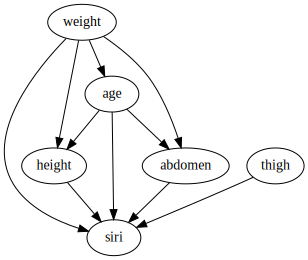

In [ ]:
b_dag = gv.Digraph(name="Bikes DAG")

b_dag.node('R','siri')
b_dag.node('T','age')
b_dag.node('H','weight')
b_dag.node('U','height')
b_dag.node('W','abdomen')
b_dag.node('D','thigh')

b_dag.edges(['TR','HT','TW','WR','HR','DR','HU','TU','HW','UR'])

b_dag


I think siri as all variables have some effect on it.

Credit: Gemini for error fixing